In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [4]:
df = pd.read_csv("../data/adult.csv")
df = df[~df.eq("?").any(axis=1)]
df['salary K$'] = pd.to_numeric(df['salary K$'], errors='coerce')
df = df.dropna(subset=['salary K$'])

In [5]:
df

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [8]:
df['sex'].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [9]:
df[df["sex"] == "Male"]["age"].mean()

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [16]:
poland_natives_count = df[df["native-country"] == "Poland"].shape[0]
total_count = df.shape[0]

percentage = (poland_natives_count / total_count) * 100

In [17]:
percentage

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [21]:
df_salery_gt_50 = df[df["salary"] == ">50K"]
df_salery_ltq_50 = df[df["salary"] == "<=50K"]
print("Mean of ages peoples that earns more than 50K:", df_salery_gt_50["age"].mean())
print("Std of ages peoples that earns that earns more than 50K:", df_salery_gt_50["age"].std())

print("Mean of ages peoples that earns less then or equal 50K", df_salery_ltq_50["age"].mean())
print("Std of ages peoples that earns less then or equal 50K:", df_salery_ltq_50["age"].std())

Mean of ages peoples that earns more than 50K: 43.95911028236548
Std of ages peoples that earns that earns more than 50K: 10.269632835673852
Mean of ages peoples that earns less then or equal 50K 36.60806038668668
Std of ages peoples that earns less then or equal 50K: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [25]:
people_without_higher_education = df[~df["education"].isin(("Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"))]
people_without_higher_education[people_without_higher_education["salary"] == ">50K"].shape[0]

3178

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [35]:
tmp = df.groupby("education").describe()
tmp.columns = ['_'.join(col).strip() for col in tmp.columns.values]
tmp

,Unnamed: 0_count,Unnamed: 0_mean,Unnamed: 0_std,Unnamed: 0_min,Unnamed: 0_25%,Unnamed: 0_50%,Unnamed: 0_75%,Unnamed: 0_max,age_count,age_mean,...,hours-per-week_75%,hours-per-week_max,salary K$_count,salary K$_mean,salary K$_std,salary K$_min,salary K$_25%,salary K$_50%,salary K$_75%,salary K$_max
education,,,,,,,,,,,,,,,,,,,,,
10th,820.0,16099.841463,9323.630350,219.0,7860.75,16110.5,24230.75,32551.0,820.0,37.897561,...,40.0,99.0,820.0,43.912195,47.890388,15.0,25.0,33.0,43.00,347.0
11th,1048.0,16230.614504,9435.727749,3.0,7773.25,16491.5,24275.25,32522.0,1048.0,32.363550,...,40.0,99.0,1048.0,41.527672,46.846283,15.0,24.0,32.0,42.00,345.0
12th,377.0,17524.734748,9160.712573,415.0,9895.00,18630.0,25040.00,32535.0,377.0,32.013263,...,40.0,99.0,377.0,42.761273,47.213033,15.0,24.0,33.0,43.00,349.0
1st-4th,151.0,17502.503311,9788.829534,416.0,9009.00,17445.0,27132.50,32425.0,151.0,44.622517,...,40.0,96.0,151.0,37.556291,34.351446,15.0,24.0,31.0,41.50,279.0
5th-6th,288.0,16845.131944,9273.562959,56.0,9557.75,17173.0,25550.25,32334.0,288.0,41.649306,...,40.0,75.0,288.0,39.857639,42.081933,15.0,23.0,33.0,43.00,347.0
7th-8th,557.0,16283.675045,9328.136399,15.0,8014.00,16464.0,24473.00,32517.0,557.0,47.631957,...,40.0,99.0,557.0,42.095153,47.388376,15.0,24.0,32.0,42.00,347.0
9th,455.0,16306.367033,9438.104861,6.0,7638.50,16734.0,24516.00,32501.0,455.0,40.303297,...,40.0,99.0,455.0,43.028571,50.022784,15.0,24.5,33.0,42.00,349.0
Assoc-acdm,1008.0,16667.503968,9503.534369,13.0,8176.00,16897.5,24918.25,32556.0,1008.0,37.286706,...,45.0,99.0,1008.0,75.566468,87.291460,15.0,26.0,38.0,61.25,349.0
Assoc-voc,1307.0,16520.351186,9429.290747,48.0,8453.50,16722.0,24410.50,32552.0,1307.0,38.246366,...,45.0,99.0,1307.0,76.102525,86.446091,15.0,27.0,39.0,64.00,349.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [49]:
print("Married avg salary: ", df[((df["marital-status"].str.startswith("Married")) & (df["sex"] == "Male"))]["salary K$"].mean())
print("Not married avg salary: ", df[((~df["marital-status"].str.startswith("Married")) & (df["sex"] == "Male"))]["salary K$"].mean())

Married avg salary:  107.49455968688845
Not married avg salary:  46.59723865877712


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [52]:
max_hours_per_week = df["hours-per-week"].max()
df[df["hours-per-week"] == max_hours_per_week].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

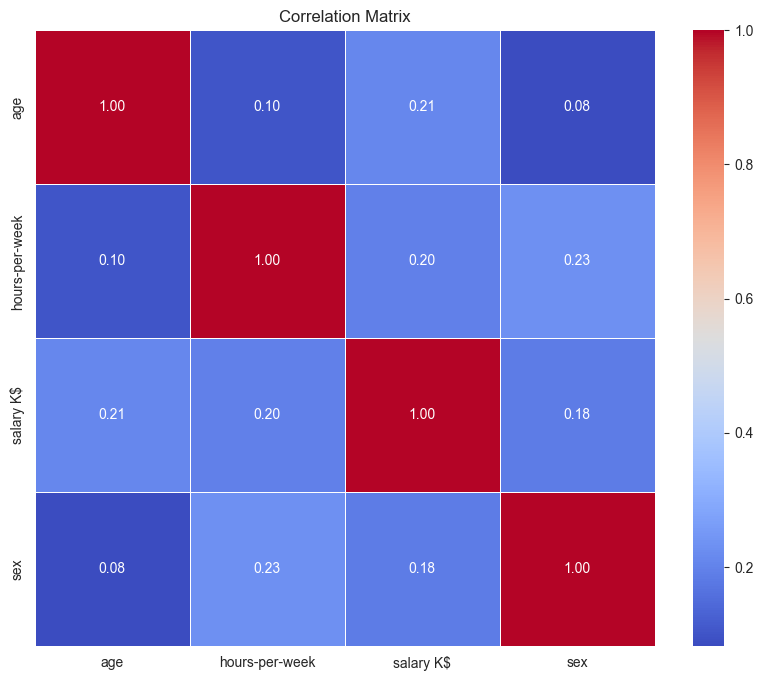

In [5]:
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(df.columns[0], axis=1)
numeric_df["sex"] = df["sex"].map({"Male":1, "Female":0})
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()